In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [3]:
inp = Input(shape=(28,28,1))
x = Conv2D(32, (3,3), activation='elu')(inp)
x = Conv2D(32, (3,3), activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
out = Dense(10, activation='softmax')(x)

m = Model(inp, out)
m.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-3), metrics=['accuracy'])

In [4]:
def convert(labels):
    y = []
    for i in range(len(labels)):
        a = np.zeros(10)
        a[labels[i]] = 1
        y.append(a)
    return y

y_train = convert(y_train)
y_test = convert(y_test)

In [5]:
x_train = x_train / 255
x_test = x_test / 255

x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [6]:
print(np.max(x_train[0]), np.min(x_train[0]))

1.0 0.0


In [7]:
print((x_train.shape, y_train.shape), (x_test.shape, y_test.shape))

(TensorShape([60000, 28, 28]), TensorShape([60000, 10])) (TensorShape([10000, 28, 28]), TensorShape([10000, 10]))


In [8]:
m.fit(x_train, y_train, batch_size=64, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
938/938 [==============================] - 68s 72ms/step - loss: 0.3202 - accuracy: 0.9015 - val_loss: 0.1078 - val_accuracy: 0.9663
Epoch 2/2
938/938 [==============================] - 79s 84ms/step - loss: 0.0872 - accuracy: 0.9741 - val_loss: 0.0829 - val_accuracy: 0.9748


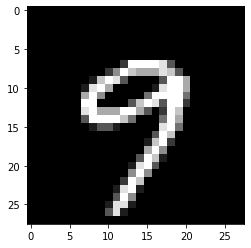

9


In [29]:
import matplotlib.pyplot as plt
sample = x_test[np.random.choice(len(x_test))]
plt.imshow(sample, 'gray')
plt.show()
print(np.argmax(m.predict(tf.convert_to_tensor([sample]))[0]))

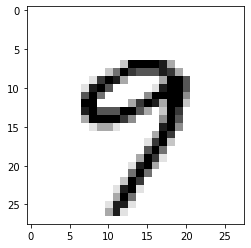

1


In [30]:
# just inverting colors makes accuracy really worse

inverted_sample = []
for i in range(len(sample)):
    for j in range(len(sample[i])):
        inverted_sample.append(0 + (1-sample[i][j]))
inverted_sample = np.array(inverted_sample).reshape(28,28)
plt.imshow(inverted_sample, 'gray')
plt.show()
print(np.argmax(m.predict(tf.convert_to_tensor([inverted_sample]))[0]))